# Cutoff rules for strong field ionization

## Direct electrons
From [Joachain, Kylstra, and Potvliege](https://books.google.com/books?id=MRQDxWm6-3UC&printsec=frontcover&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false), the electric field $\mathbf{E}(t)$ is given by

$\mathbf{E}(t) = \frac{E_0}{\left(1+\xi^2\right)^{1/2}} \left[ \mathbf{\hat{x}}\cos(\omega t+\theta) - \xi \mathbf{\hat{y}}\sin(\omega t+\theta)\right]$,

where $E_0$ is the electric field magnitude of linearly polarized light, $\xi$ is the ellipticity of the laser, $\omega$ is the angular frequency of the laser field, $\mathbf{\hat{x}}$ and $\mathbf{\hat{y}}$ are unit vectors in the polarizaiton plane, $t$ is time in seconds, and $\theta$ is a phase offset which we will use to delay two fields with respect to one another.

$E_0$ is related to the laser intensity as 

$E_0 = \sqrt{\frac{2I}{c\varepsilon_0}}$,

where $c = 3.0\times10^8 \mathrm{\ m/s}$ is the speed of light, $\varepsilon_0 \approx 8.85\times10^{-21}\mathrm{\ C^2/Nm^2}$ is the permittivity of free space, and $I$ is the intensity in $\mathrm{W/m^2}$, so we must multiply our intensities (in $\mathrm{W/cm^2}$) by $10^4$.

The force $F$ experienced by an electron is 

$\mathbf{F} = q \mathbf{E}(t)$,

where $q=1.602\times10^{-19} \mathrm{\ C}$ is the charge of the electron.

The velocity of an electron (assuming that the initial velocity is zero) is given by

$\mathbf{v}(t) = \int_{t_b}^{t}{q\mathbf{E}(t^\prime)/m_e dt^\prime}$,

where $t_b$ is the time of electron tunneling and $m_e$ is the mass of the electron.

Integrating yields

$\mathbf{v}(t) = \frac{E_0}{m_e\left(1+\xi^2\right)^{1/2}} \left\{
\frac{\mathbf{\hat{x}}}{\omega}\left[
\sin(\omega t+\theta) - \sin(\omega t_b+\theta)\right] +
\frac{\mathbf{\xi \hat{y}}}{\omega}\left[
\cos(\omega t+\theta) - \cos(\omega t_b+\theta)\right]
\right\}$.

Throwing away the time-dependent part, yields just the final drift velocity,

$\mathbf{v}_f(t) = \frac{E_0}{m_e\left(1+\xi^2\right)^{1/2}} \left\{
-\frac{\mathbf{\hat{x}}}{\omega}\left[
\sin(\omega t_b+\theta)\right] -
\frac{\mathbf{\xi \hat{y}}}{\omega}\left[
\cos(\omega t_b+\theta)\right]
\right\}$.

Multiplying by $m_e$ gives us the final drift momentum of the electron,

$\mathbf{p}_f(t) = \frac{E_0}{\left(1+\xi^2\right)^{1/2}} \left\{
-\frac{\mathbf{\hat{x}}}{\omega}\left[
\sin(\omega t_b+\theta)\right] -
\frac{\mathbf{\xi \hat{y}}}{\omega}\left[
\cos(\omega t_b+\theta)\right]
\right\}$.


### Numerical calculations
First we import the Python math libraries and define some constants:

In [1]:
%matplotlib inline                   
import numpy as np                   # for math
import matplotlib.pyplot as plt      # for graphs
import mpld3;mpld3.enable_notebook() # interactive graphs
import seaborn; seaborn.set()        # prettier graphs

##### Constants:
q  = 1.602e-19    # Coulombs   Charge of electron
c  = 2.99792458e8 # m/s        Speed of light
eo = 8.8541e-12   # C^2/(Nm^2) Permittivity of vacuum
me = 9.109e-31    # kg         Mass of electron

We define a function that calculates the E-field and drift momentum, given a set of laser parameters:

In [2]:
def E_and_P(t=np.linspace(0,800e-9/c,100),
            I1=1e14,I2=1e14,wavelength1=800e-9,wavelength2=400e-9,
            ellip1=0,ellip2=0,delay=0):
    # This function calculates the E-field and final momentum for a given 
    # time (or array of times) and the laser parameters
    # Intensities are given in W/cm2 (!!)
    # Wavelengths are in meters
    # Ellipticity of +/-1 = circular, 0 = linear
    # Delay is in seconds

    w1  = c/wavelength1 * 2. * np.pi # Angular frequency of field 1
    w2  = c/wavelength2 * 2. * np.pi # Angular frequency of field 2
    Eo1 = np.sqrt(2*I1*10**4/(c*eo)) # Electric field in V/m
    Eo2 = np.sqrt(2*I2*10**4/(c*eo)) # Electric field in V/m
    
    # Scale Eo to get same intensity for all ellipticity values
    Eo1 = Eo1/np.sqrt(ellip1**2+1)
    Eo2 = Eo2/np.sqrt(ellip2**2+1)
    
    # Calculate components of E-fields
    Ex1 =         Eo1*np.cos(w1*t) 
    Ey1 = -ellip1*Eo1*np.sin(w1*t) 
    Ex2 =         Eo2*np.cos(w2*(t+delay))
    Ey2 = -ellip2*Eo2*np.sin(w2*(t+delay))
    
    # Add fields to make circular/elliptical
    Ex = Ex1 + Ex2
    Ey = Ey1 + Ey2

    # Calculate components of final drift momentum
    Px1 =         -q*Eo1*np.sin(w1*t)/w1     
    Py1 =  -ellip1*q*Eo1*np.cos(w1*t)/w1   
    Px2 =         -q*Eo2*np.sin(w2*(t+delay))/w2 
    Py2 =  -ellip2*q*Eo2*np.cos(w2*(t+delay))/w2 

    Px = Px1 + Px2
    Py = Py1 + Py2
    
    # Convert final drift momenta from SI to atomic units:
    Px = Px/1.992e-24
    Py = Py/1.992e-24
    
    return Ex,Ey, Px,Py

Now we can make a plot of the electric field and the final drift momentum of the electrons in the case of 400 + 800 nm counter-rotating fields.

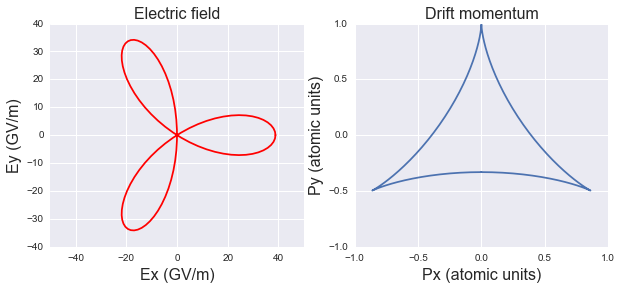

In [3]:
# Set up the plots:
fig = plt.figure(figsize=(10,4))

ax1 = plt.subplot(121)
ax1.set_title('Electric field',fontsize=16)
ax1.set_xlabel('Ex (GV/m)',fontsize=16)
ax1.set_ylabel('Ey (GV/m)',fontsize=16)
ax1.set_xlim(-50,50)
ax1.set_ylim(-40,40)

ax2 = plt.subplot(122)
ax2.set_title('Drift momentum',fontsize=16)
ax2.set_xlabel('Px (atomic units)',fontsize=16)
ax2.set_ylabel('Py (atomic units)',fontsize=16)
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)

def plot_E_and_P(t=np.linspace(0,800e-9/c,100),I1=1e14,I2=1e14,wavelength1=800e-9,wavelength2=400e-9,
            ellip1=1,ellip2=-1,delay=0):
    # Calculate E and P for counter-rotating fields
    Ex,Ey, Px,Py = E_and_P(t=t,I1=I1,I2=I2,wavelength1=wavelength1,wavelength2=wavelength2,
                           ellip1=ellip1,ellip2=ellip2,delay=delay)
    ax1.plot(Ex/1e9,Ey/1e9,color='r')
    ax2.plot(Px,Py)

plot_E_and_P()

Let's make a function to calculate the ponderomotive potential:

In [4]:
def UPs(wavelength1,wavelength2,I1,I2):
    # Calculates the ponderomotive potential for to wavelengths and adds them together
    # Wavelengths are in meters
    # Intensities are in W/cm2
    # Ups are returned in eV
    # using the equation from http://power1.pc.uec.ac.jp/~toru/keldysh/

    Up1 = 9.337e-5 * (wavelength1*1e9)**2 * I1/1e15
    Up2 = 9.337e-5 * (wavelength2*1e9)**2 * I2/1e15
    Up = Up1+Up2
    return Up1, Up2, Up

Let's look at the E-field and vector potential for a range of different relative intensities, and add some circles corresponding to 1 and 2 Up:

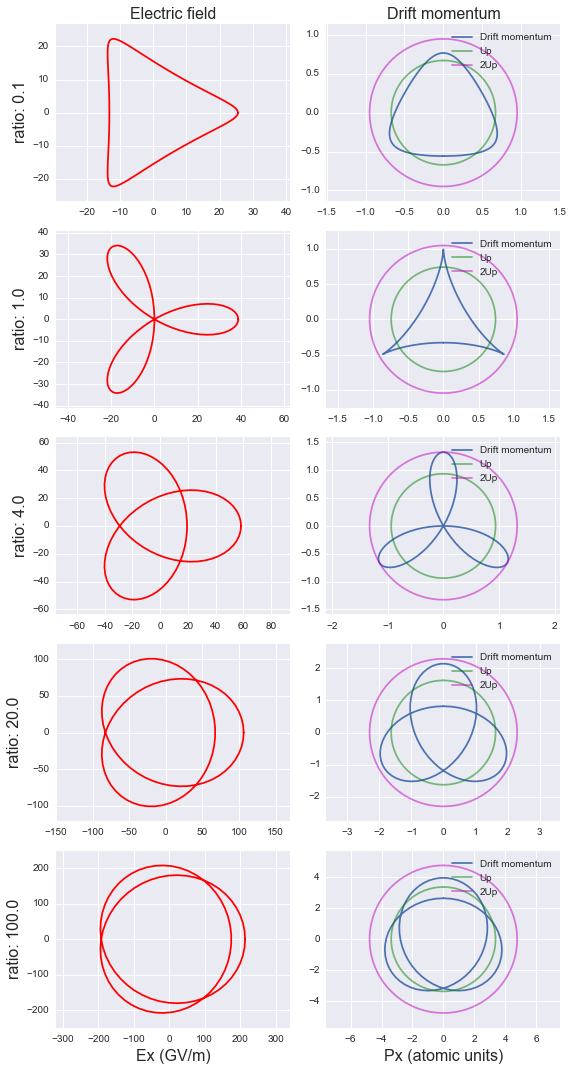

In [5]:
fig,axs = plt.subplots(5,2,figsize=(8,15))

I1    = 1e14
wave1 = 800e-9
wave2 = 400e-9

axs[0,0].set_title('Electric field',fontsize=16)
axs[0,1].set_title('Drift momentum',fontsize=16)

axs[-1,0].set_xlabel('Ex (GV/m)',fontsize=16)
axs[-1,1].set_xlabel('Px (atomic units)',fontsize=16)

for row,ratio in enumerate((0.1,1,4,20,100)):
    I2 = I1*ratio
    t = np.linspace(0,wave1/c,100)
    # Calculate E and P for counter-rotating fields using defaults:
    Ex,Ey, Px,Py = E_and_P(t,wavelength1=wave1,wavelength2=wave2,I1=I1,I2=I2,ellip1=1,ellip2=-1)
    
    ax1 = axs[row,0]
    ax2 = axs[row,1]
    
    # Make the plots:
    ax1.plot(Ex/1e9,Ey/1e9,color='r')
    ax2.plot(Px,Py,label='Drift momentum')

    ax1.set_ylabel('ratio: %.1f'%ratio,fontsize=16)
    
    # Calculate the Up
    Up1,Up2,Up = UPs(wave1,wave2,I1,I2)
    P_Up =    (Up/13.6)**0.5 # convert Up (in eV) to momentum (atomic units)
    P_2Up = (2*Up/13.6)**0.5 

    # Draw the Up circle
    angle = np.linspace(0,2*np.pi,100)
    x = np.sin(angle)
    y = np.cos(angle)
    ax2.plot(x*P_Up, y*P_Up, color='g',alpha=0.5,label='Up')
    ax2.plot(x*P_2Up,y*P_2Up,color='m',alpha=0.5,label='2Up')

    leg = ax2.legend(); leg.draw_frame(False)
    for ax in (ax1,ax2):
        ax.set_aspect('equal','datalim')
        ax.margins(0.1)

plt.tight_layout() # tell the plots to make use of the space more efficiently

We can see that the **maximum** final drift momentum of the electrons always ranges from 1 to 2 Up. It seems to reach 2 Up only at a 400:800 ratio of 4:1. As either the 400 or 800 becomes far stronger, this cutoff moves to the cutoff for pure circular polarizaion, which is Up. 

The **minimum** value for the momentum has the opposite behavior, reaching zero at 4:1. But it, of course, also goes to 1 Up as either field becomes dominate.

We can make a plot showing the behavior of the minimum and maximum electron energy as a function of the field ratio:

(-0.5, 2.5)

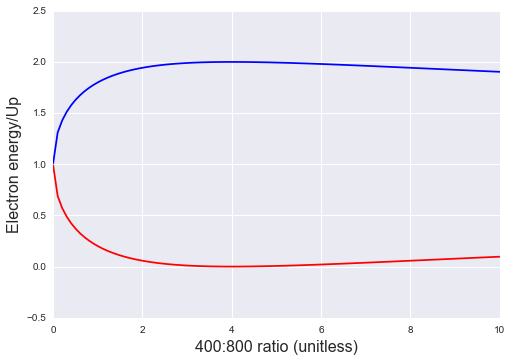

In [6]:
fig = plt.figure()
ax  = plt.subplot(111)

I1    = 1e14
wave1 = 800e-9
wave2 = 400e-9

ratios = []
Emins  = []
Emaxs  = []

for ratio in np.linspace(0.0001,10,100):
    period = wave1/c
    t = np.linspace(0,period,200)
    
    I2 = ratio*I1
    
    Ex,Ey, Px,Py = E_and_P(t,wavelength1=wave1,wavelength2=wave2,I1=I1,I2=I2,ellip1=1,ellip2=-1)
    Up1,Up2,Up = UPs(wave1,wave2,I1,I2)

    P = np.sqrt(Px**2+Py**2)
    E = 13.6*P**2
    Emin = np.min(E)/Up
    Emax = np.max(E)/Up
    
    ratios.append(ratio)
    Emins.append(Emin)
    Emaxs.append(Emax)

ax.plot(ratios,Emaxs,color='b',label='Maximum electron energy')
ax.plot(ratios,Emins,color='r',label='Minimum electron energy')

ax.set_xlabel('400:800 ratio (unitless)',fontsize=16)
ax.set_ylabel('Electron energy/Up',fontsize=16)
ax.set_ylim(-0.5,2.5)

This makes sense; when the red is much higher than the blue (ratio->0), then both the minimum and maximum go to Up. **Additionally, at a ratio of 4:1, the maximum goes to 2Up and the minimum goes to zero**, just like for linear polarization with a single color. But it's hard to see the entire range of relatve intensity ratios here. Let's try a log scale on the x-axis, which can show everything. 

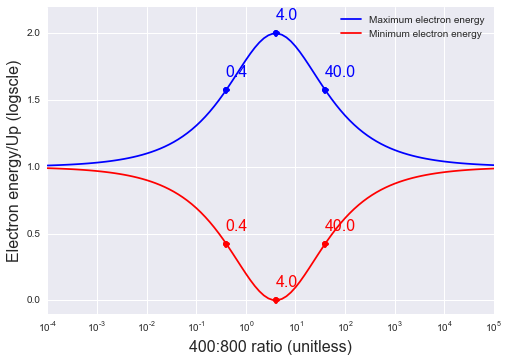

In [7]:
fig = plt.figure()
ax  = plt.subplot(111)

I1    = 1e14
wave1 = 800e-9
wave2 = 400e-9

ratios = []
Emins  = []
Emaxs  = []

for ratio in np.logspace(-4,5,100):
    period = wave1/c
    t = np.linspace(0,period,200)
    
    I2 = ratio*I1
    
    Ex,Ey, Px,Py = E_and_P(t,wavelength1=wave1,wavelength2=wave2,I1=I1,I2=I2,ellip1=1,ellip2=-1)
    Up1,Up2,Up = UPs(wave1,wave2,I1,I2)

    P = np.sqrt(Px**2+Py**2)
    E = 13.6*P**2
    Emin = np.min(E)/Up
    Emax = np.max(E)/Up
    
    ratios.append(ratio)
    Emins.append(Emin)
    Emaxs.append(Emax)

ax.set_xscale('log')
    
#label some special points:
for ratio in (0.4,4,40):
    I2 = ratio*I1
    
    Ex,Ey, Px,Py = E_and_P(t,wavelength1=wave1,wavelength2=wave2,I1=I1,I2=I2,ellip1=1,ellip2=-1)
    Up1,Up2,Up = UPs(wave1,wave2,I1,I2)

    P = np.sqrt(Px**2+Py**2)
    E = 13.6*P**2
    Emin = np.min(E)/Up
    Emax = np.max(E)/Up
    
    ax.plot(ratio,Emax,'bo')
    ax.plot(ratio,Emin,'ro')
    
    ax.text(ratio,Emax +0.1,'%.1f'%ratio,fontsize=16,color='b')
    ax.text(ratio,Emin +0.1,'%.1f'%ratio,fontsize=16,color='r')


ax.plot(ratios,Emaxs,color='b',label='Maximum electron energy')
ax.plot(ratios,Emins,color='r',label='Minimum electron energy')

ax.set_xlabel('400:800 ratio (unitless)',fontsize=16)
ax.set_ylabel('Electron energy/Up (logscle)',fontsize=16)

ax.set_ylim(-0.1,2.2)

leg = ax.legend(); leg.draw_frame(False)


This looks pretty good. We can see that there is a clear transition from the pure one-color-circular behavior at both the left and right sides of this graph, to a "0-to-2Up" behavior at a 4:1 400:800 ratio that is reminiscent of one-color linear.  

In Dejan's analytical derivation, he found that the drift energy 
$\frac{Ed}{Up} = 1 \pm \frac{\sqrt{R}}{(1+R/4)}$

where $R = \frac{I_2}{I_1}$ is the ratio between the two fields.

Let's include that in our graph:

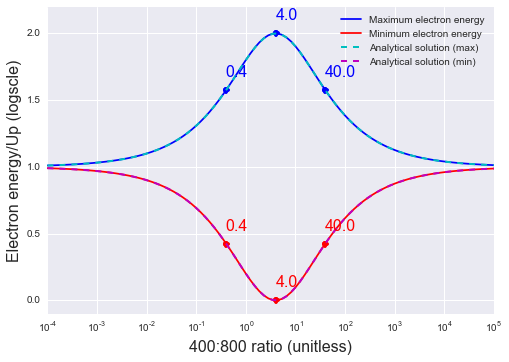

In [8]:
fig = plt.figure()
ax  = plt.subplot(111)

I1    = 1e14
wave1 = 800e-9
wave2 = 400e-9

ratios = []
Emins  = []
Emaxs  = []

for ratio in np.logspace(-4,5,100):
    period = wave1/c
    t = np.linspace(0,period,200)
    
    I2 = ratio*I1
    
    Ex,Ey, Px,Py = E_and_P(t,wavelength1=wave1,wavelength2=wave2,I1=I1,I2=I2,ellip1=1,ellip2=-1)
    Up1,Up2,Up = UPs(wave1,wave2,I1,I2)

    P = np.sqrt(Px**2+Py**2)
    E = 13.6*P**2
    Emin = np.min(E)/Up
    Emax = np.max(E)/Up
    
    ratios.append(ratio)
    Emins.append(Emin)
    Emaxs.append(Emax)

ax.set_xscale('log')
    
#label some special points:
for ratio in (0.4,4,40):
    I2 = ratio*I1
    
    Ex,Ey, Px,Py = E_and_P(t,wavelength1=wave1,wavelength2=wave2,I1=I1,I2=I2,ellip1=1,ellip2=-1)
    Up1,Up2,Up = UPs(wave1,wave2,I1,I2)

    P = np.sqrt(Px**2+Py**2)
    E = 13.6*P**2
    Emin = np.min(E)/Up
    Emax = np.max(E)/Up
    
    ax.plot(ratio,Emax,'bo')
    ax.plot(ratio,Emin,'ro')
    
    ax.text(ratio,Emax +0.1,'%.1f'%ratio,fontsize=16,color='b')
    ax.text(ratio,Emin +0.1,'%.1f'%ratio,fontsize=16,color='r')


ax.plot(ratios,Emaxs,color='b',label='Maximum electron energy')
ax.plot(ratios,Emins,color='r',label='Minimum electron energy')

ax.set_xlabel('400:800 ratio (unitless)',fontsize=16)
ax.set_ylabel('Electron energy/Up (logscle)',fontsize=16)

ax.set_ylim(-0.1,2.2)

# the new part:
R = np.logspace(-4,5,100)
y = 1+np.sqrt(R)/(1+R/4)
ax.plot(R,y,color='c',lw=2,ls='dashed',label='Analytical solution (max)')

y = 1-np.sqrt(R)/(1+R/4)
ax.plot(R,y,color='m',lw=2,ls='dashed',label='Analytical solution (min)')


leg = ax.legend(); leg.draw_frame(False)



# Including rescattering (work in progress...)

We can include hard rescattering in a very simple model. We will just calculate the trajectory of the electrons (ignoring the Coulomb potential). If the electrons come back within some distance of the ion (say 0.05 nm), then we will let them scatter through 360 degrees. We will calculate the final momentum of each of these trajectories and find the maximum energy that the electrons can have.

First, we start with the equation for the velocity that we derived above:

$\mathbf{v}(t) = \frac{E_0}{m_e\left(1+\xi^2\right)^{1/2}} \left\{
\frac{\mathbf{\hat{x}}}{\omega}\left[
\sin(\omega t+\theta) - \sin(\omega t_b+\theta)\right] +
\frac{\mathbf{\xi \hat{y}}}{\omega}\left[
\cos(\omega t+\theta) - \cos(\omega t_b+\theta)\right]
\right\}$

...This is a work in progress...